# Validation

Model validation: How well is your model performing?

In the previous notebook, we tested our data on the same set of data that was used for training. That's cheating!!

If we optimize our model this way, we will **over-fit** the data: that is, we learn the patterns that are true for that particular dataset, but don't generalize well to data that the model hasn't seen before.

## Holdout method

Create our own test set (different from the Kaggle one!). 

- That test set is not going to be used to train the model. 
- Since, you'll know the true value of the holdout set, you'll be able to assess how good your model is performing without cheating


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('trainDataFeatures.tsv', sep='\t', index_col=0)

In [3]:
columns = df.columns[3:]

In [4]:
X = np.asarray(df[columns])
y = np.asarray(df.sentiment.transpose())

In [5]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape

((18750, 9), (6250, 9))

In [6]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [7]:
y_pred = nb.predict(X_test)
print("{0} / {1} correct".format(np.sum(y_test == y_pred), len(y_test)))

4169 / 6250 correct


**Accuracy:** the number of correct matches divided by the total number of samples

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.66703999999999997

## Crossvalidation

In [9]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
cv = cross_val_score(MultinomialNB(), X_train, y_train, cv=10)

In [10]:
cv.mean()

0.67136046475959898

## Confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[1493, 1656],
       [ 425, 2676]])

## ROC curve

In [12]:
from sklearn.metrics import roc_auc_score

In [13]:
from sklearn.metrics import roc_curve

In [14]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

In [18]:
roc_auc_score(y_test, y_pred)

0.66853310208684058

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()

In [21]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [22]:
y_pred = lr.predict(X_test)

In [23]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

In [32]:
roc_curve?

In [27]:
from sklearn.metrics import roc_auc_score

In [28]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

In [33]:
roc_auc_score?

In [29]:
roc_auc_score(y_test, y_pred)

0.67023790664030469

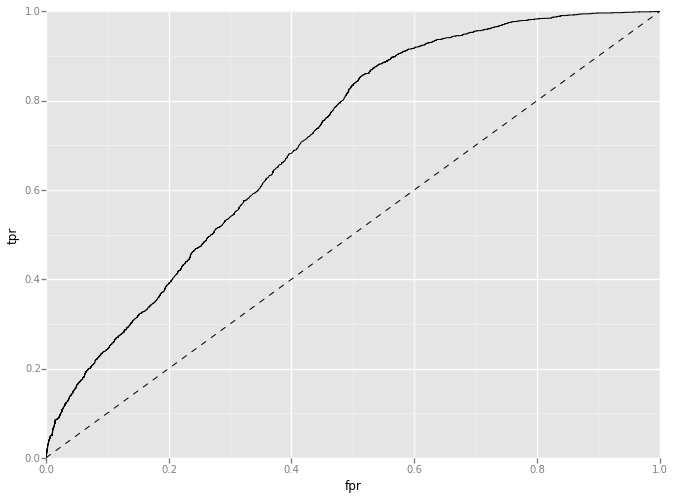

<ggplot: (287889785)>

In [31]:
from ggplot import *

preds = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')